# Simulating nonlinear optical processes on a superconducting quantum device

Original author of paper: Yuan Shi, Bram Evert, Amy F. Brown, Vinay Tripathi, Eyob A. Sete, Vasily Geyko, Yujin Cho, Jonathan L DuBois, Daniel Lidar, Ilon Joseph, Matt Reagor

Link to pre-print: https://arxiv.org/abs/2406.13003

Notebook by: [Óscar Amaro](https://github.com/OsAmaro) (June 2024)

__Notes:__

In [1]:
import numpy as np
from numpy import log, log10, sin, cos, exp, sqrt, pi, euler_gamma
import pandas as pd
import glob as glob
import h5py
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from scipy.linalg import expm
from matplotlib import cm
import json

In [2]:
# matrix defined in equation 3.2ab
# s2=4
def Hs24(rho):
    s2 = 4; s3 = 3; theta = 0
    d = min(s2,s3)+1
    expth = exp(1j*theta)
    mat = np.zeros((d,d),dtype=complex)
    for k in range(1,d):
        mat[k,k-1] = sqrt((k+1)*(s2+1-(k+1))*(s3-s2+(k+1)))
    mat = mat + np.transpose(np.conj(mat))
    for k in range(d):
        mat[k,k] = -0.5*rho*(k+1)*((k+1)-1)
    return mat
# s2=3
def Hs23(rho):
    s2 = 3; s3 = 3; theta = 0; d = 4
    expth = exp(1j*theta)
    mat = np.zeros((d,d),dtype=complex)
    for k in range(1,d):
        mat[k,k-1] = sqrt(k*(s2+1-k)*k)
    mat = mat + np.transpose(np.conj(mat))
    for k in range(d):
        mat[k,k] = -0.5*rho*k*(k-1)
    return mat

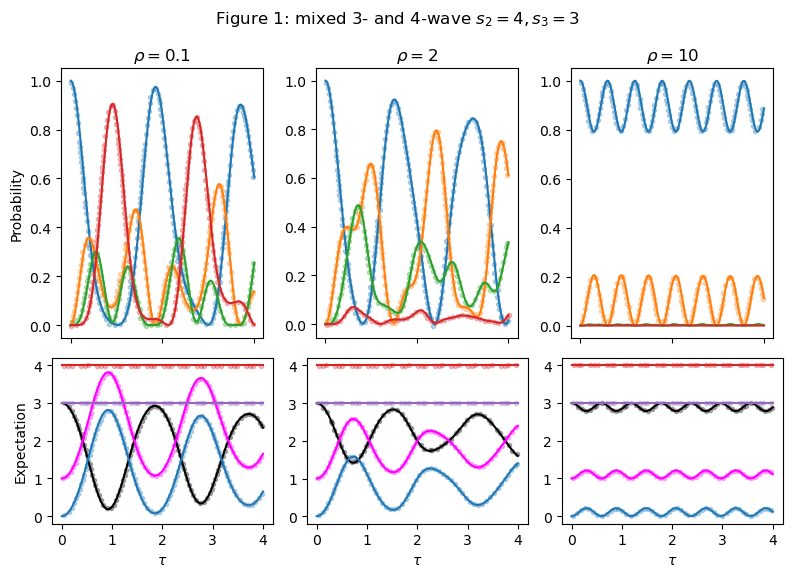

In [15]:
# ρ = {0.1,2,10}, θ = 0, s2 = 4, s3 = 3, and τf = 4
alphaPaper = 0.3
mrksz = 3

fig, axes = plt.subplots(2, 3, figsize=(8,6))

f = open('dataWPD/fig1a/wpd.json')
data = json.load(f)
datatmp = data['datasetColl'][0]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))]); indxs = np.argsort(datatmp2[:,0])
x = datatmp2[:,0][indxs]; y = datatmp2[:,1][indxs]
axes[0,0].plot(x, y, 'o', alpha=alphaPaper, color='tab:blue', markersize=mrksz)
datatmp = data['datasetColl'][1]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))]); indxs = np.argsort(datatmp2[:,0])
x = datatmp2[:,0][indxs]; y = datatmp2[:,1][indxs]
axes[0,0].plot(x, y, 'o', alpha=alphaPaper, color='tab:orange', markersize=mrksz)
datatmp = data['datasetColl'][2]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))]); indxs = np.argsort(datatmp2[:,0])
x = datatmp2[:,0][indxs]; y = datatmp2[:,1][indxs]
axes[0,0].plot(x, y, 'o', alpha=alphaPaper, color='tab:green', markersize=mrksz)
datatmp = data['datasetColl'][3]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))]); indxs = np.argsort(datatmp2[:,0])
x = datatmp2[:,0][indxs]; y = datatmp2[:,1][indxs]
axes[0,0].plot(x, y, 'o', alpha=alphaPaper, color='tab:red', markersize=mrksz)


f = open('dataWPD/fig1b/wpd.json')
data = json.load(f)
datatmp = data['datasetColl'][0]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))]); indxs = np.argsort(datatmp2[:,0])
x = datatmp2[:,0][indxs]; y = datatmp2[:,1][indxs]
axes[0,1].plot(x, y, 'o', alpha=alphaPaper, color='tab:blue', markersize=mrksz)
datatmp = data['datasetColl'][1]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))]); indxs = np.argsort(datatmp2[:,0])
x = datatmp2[:,0][indxs]; y = datatmp2[:,1][indxs]
axes[0,1].plot(x, y, 'o', alpha=alphaPaper, color='tab:orange', markersize=mrksz)
datatmp = data['datasetColl'][2]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))]); indxs = np.argsort(datatmp2[:,0])
x = datatmp2[:,0][indxs]; y = datatmp2[:,1][indxs]
axes[0,1].plot(x, y, 'o', alpha=alphaPaper, color='tab:green', markersize=mrksz)
datatmp = data['datasetColl'][3]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))]); indxs = np.argsort(datatmp2[:,0])
x = datatmp2[:,0][indxs]; y = datatmp2[:,1][indxs]
axes[0,1].plot(x, y, 'o', alpha=alphaPaper, color='tab:red', markersize=mrksz)

f = open('dataWPD/fig1c/wpd.json')
data = json.load(f)
datatmp = data['datasetColl'][0]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))]); indxs = np.argsort(datatmp2[:,0])
x = datatmp2[:,0][indxs]; y = datatmp2[:,1][indxs]
axes[0,2].plot(x, y, 'o', alpha=alphaPaper, color='tab:blue', markersize=mrksz)
datatmp = data['datasetColl'][1]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))]); indxs = np.argsort(datatmp2[:,0])
x = datatmp2[:,0][indxs]; y = datatmp2[:,1][indxs]
axes[0,2].plot(x, y, 'o', alpha=alphaPaper, color='tab:orange', markersize=mrksz)

f = open('dataWPD/fig1d/wpd.json')
data = json.load(f)
datatmp = data['datasetColl'][0]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))]); indxs = np.argsort(datatmp2[:,0])
x = datatmp2[:,0][indxs]; y = datatmp2[:,1][indxs]
axes[1,0].plot(x, y, 'o', alpha=alphaPaper, color='black', markersize=mrksz)
datatmp = data['datasetColl'][1]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))]); indxs = np.argsort(datatmp2[:,0])
x = datatmp2[:,0][indxs]; y = datatmp2[:,1][indxs]
axes[1,0].plot(x, y, 'o', alpha=alphaPaper, color='magenta', markersize=mrksz)
datatmp = data['datasetColl'][2]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))]); indxs = np.argsort(datatmp2[:,0])
x = datatmp2[:,0][indxs]; y = datatmp2[:,1][indxs]
axes[1,0].plot(x, y, 'o', alpha=alphaPaper, color='tab:blue', markersize=mrksz)
datatmp = data['datasetColl'][3]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))]); indxs = np.argsort(datatmp2[:,0])
x = datatmp2[:,0][indxs]; y = datatmp2[:,1][indxs]
axes[1,0].plot(x, y, 'o', alpha=alphaPaper, color='tab:red', markersize=mrksz)
datatmp = data['datasetColl'][4]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))]); indxs = np.argsort(datatmp2[:,0])
x = datatmp2[:,0][indxs]; y = datatmp2[:,1][indxs]
axes[1,0].plot(x, y, 'o', alpha=alphaPaper, color='tab:purple', markersize=mrksz)

f = open('dataWPD/fig1e/wpd.json')
data = json.load(f)
datatmp = data['datasetColl'][0]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))]); indxs = np.argsort(datatmp2[:,0])
x = datatmp2[:,0][indxs]; y = datatmp2[:,1][indxs]
axes[1,1].plot(x, y, 'o', alpha=alphaPaper, color='black', markersize=mrksz)
datatmp = data['datasetColl'][1]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))]); indxs = np.argsort(datatmp2[:,0])
x = datatmp2[:,0][indxs]; y = datatmp2[:,1][indxs]
axes[1,1].plot(x, y, 'o', alpha=alphaPaper, color='magenta', markersize=mrksz)
datatmp = data['datasetColl'][2]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))]); indxs = np.argsort(datatmp2[:,0])
x = datatmp2[:,0][indxs]; y = datatmp2[:,1][indxs]
axes[1,1].plot(x, y, 'o', alpha=alphaPaper, color='tab:blue', markersize=mrksz)
datatmp = data['datasetColl'][3]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))]); indxs = np.argsort(datatmp2[:,0])
x = datatmp2[:,0][indxs]; y = datatmp2[:,1][indxs]
axes[1,1].plot(x, y, 'o', alpha=alphaPaper, color='tab:red', markersize=mrksz)
datatmp = data['datasetColl'][4]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))]); indxs = np.argsort(datatmp2[:,0])
x = datatmp2[:,0][indxs]; y = datatmp2[:,1][indxs]
axes[1,1].plot(x, y, 'o', alpha=alphaPaper, color='tab:purple', markersize=mrksz)

f = open('dataWPD/fig1f/wpd.json')
data = json.load(f)
datatmp = data['datasetColl'][0]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))]); indxs = np.argsort(datatmp2[:,0])
x = datatmp2[:,0][indxs]; y = datatmp2[:,1][indxs]
axes[1,2].plot(x, y, 'o', alpha=alphaPaper, color='black', markersize=mrksz)
datatmp = data['datasetColl'][1]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))]); indxs = np.argsort(datatmp2[:,0])
x = datatmp2[:,0][indxs]; y = datatmp2[:,1][indxs]
axes[1,2].plot(x, y, 'o', alpha=alphaPaper, color='magenta', markersize=mrksz)
datatmp = data['datasetColl'][2]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))]); indxs = np.argsort(datatmp2[:,0])
x = datatmp2[:,0][indxs]; y = datatmp2[:,1][indxs]
axes[1,2].plot(x, y, 'o', alpha=alphaPaper, color='tab:blue', markersize=mrksz)
datatmp = data['datasetColl'][3]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))]); indxs = np.argsort(datatmp2[:,0])
x = datatmp2[:,0][indxs]; y = datatmp2[:,1][indxs]
axes[1,2].plot(x, y, 'o', alpha=alphaPaper, color='tab:red', markersize=mrksz)
datatmp = data['datasetColl'][4]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))]); indxs = np.argsort(datatmp2[:,0])
x = datatmp2[:,0][indxs]; y = datatmp2[:,1][indxs]
axes[1,2].plot(x, y, 'o', alpha=alphaPaper, color='tab:purple', markersize=mrksz)


### ED
s2 = 4; s3 = 3;
tdim = 500
tmax = 4.0
tlst = np.linspace(0,tmax,tdim)
jlst = np.arange(1,4.1,1)
dt = tlst[1]-tlst[0]
psi0 = np.array([1,0,0,0],dtype=complex)
for k in range(3):
    rho = np.array([0.1,2,10])[k]
    psi = np.copy(psi0)
    U = expm(-1j*Hs24(rho)*dt)
    probs = np.zeros((tdim,4))
    obss = np.zeros((tdim,5))
    for i in range(tdim):
        # probabilities
        probs[i,:] = np.abs(psi)**2
        # observables
        obss[i,0] = np.sum( np.abs(psi)**2 * (s2-jlst) )    
        obss[i,1] = np.sum( np.abs(psi)**2 * (jlst) )    
        obss[i,2] = np.sum( np.abs(psi)**2 * (s3-s2+jlst) )    
        obss[i,3] = obss[i,0] + obss[i,1]
        obss[i,4] = obss[i,0] + obss[i,2]
        # update wavefunction
        psi = U @ psi
    axes[0,k].plot(tlst, probs[:,0], color='tab:blue')
    axes[0,k].plot(tlst, probs[:,1], color='tab:orange')
    axes[0,k].plot(tlst, probs[:,2], color='tab:green')
    axes[0,k].plot(tlst, probs[:,3], color='tab:red')
    axes[1,k].plot(tlst, obss[:,0], color='black')
    axes[1,k].plot(tlst, obss[:,1], color='magenta')
    axes[1,k].plot(tlst, obss[:,2], color='tab:blue')
    axes[1,k].plot(tlst, obss[:,3], color='tab:red')
    axes[1,k].plot(tlst, obss[:,4], color='tab:purple')


axes[0,0].set_ylabel(r'Probability')
axes[0,0].set_title(r'$\rho=0.1$')
axes[0,1].set_title(r'$\rho=2$')
axes[0,2].set_title(r'$\rho=10$')
axes[1,0].set_ylabel(r'Expectation')
# Set aspect ratios
for ax in axes[0]:
    ax.set_xticklabels([])
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    axesratio = (ymax-ymin)/(xmax-xmin)
    ax.set_aspect(aspect=4/3/axesratio)
for ax in axes[1]:
    ax.set_xlabel(r'$\tau$')
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    axesratio = (ymax-ymin)/(xmax-xmin)
    ax.set_aspect(aspect=3/4/axesratio)
plt.suptitle(r'Figure 1: mixed 3- and 4-wave $s_2=4,s_3=3$')
plt.tight_layout(h_pad=0.001)
#plt.savefig('fig1.pdf')
plt.show()

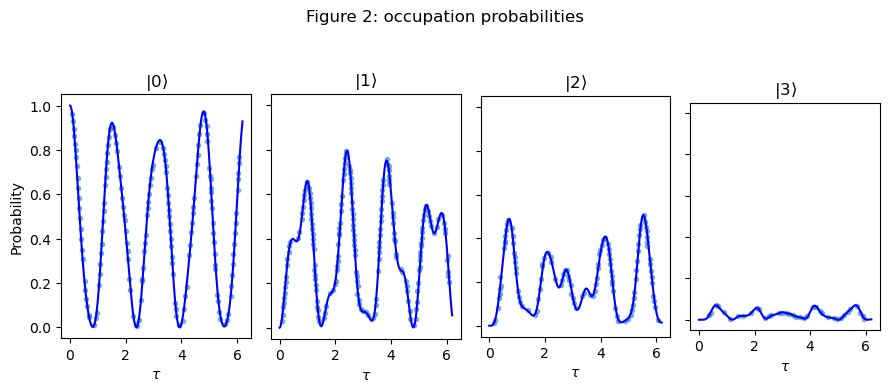

In [14]:
# ρ = 2, θ = 0, s2 = 4, s3 = 3, and τf = 6
alphaPaper = 0.5
mrksz = 3

fig, axes = plt.subplots(1, 4, figsize=(9,4))
for i in range(4):
    f = open('dataWPD/fig2{}/wpd.json'.format(['a','b','c','d'][i]))
    data = json.load(f)
    datatmp = data['datasetColl'][0]['data']
    datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))]); indxs = np.argsort(datatmp2[:,0])
    x = datatmp2[:,0][indxs]; y = datatmp2[:,1][indxs]
    axes[i].plot(x, y, 'o', alpha=alphaPaper, color='tab:blue', markersize=mrksz)
    axes[i].set_title(r'$|{}\rangle$'.format(i))
    axes[i].set_xlabel(r'$\tau$')
    axes[i].set_ylim([-0.05,1.05])
    # Set aspect ratios
    xmin, xmax = axes[i].get_xlim()
    ymin, ymax = axes[i].get_ylim()
    axesratio = (ymax-ymin)/(xmax-xmin)
    axes[i].set_aspect(aspect=4/3/axesratio)
    if i>0:
        axes[i].set_yticklabels([])
axes[0].set_ylabel(r'Probability')

### ED
tdim = 500
tmax = 6.2
tlst = np.linspace(0,tmax,tdim)
dt = tlst[1]-tlst[0]
psi0 = np.array([1,0,0,0],dtype=complex)
# a
psi = np.copy(psi0)
U = expm(-1j*Hs24(2.0)*dt)
probs = np.zeros((tdim,4))
for i in range(tdim):
    probs[i,:] = np.abs(psi)**2
    psi = U @ psi
for i in range(4):
    axes[i].plot(tlst, probs[:,i], color='blue') #color='tab:{}'.format(['blue','orange','green','red'][i])

plt.suptitle(r'Figure 2: occupation probabilities')
plt.tight_layout()
#plt.savefig('fig2.pdf')
plt.show()

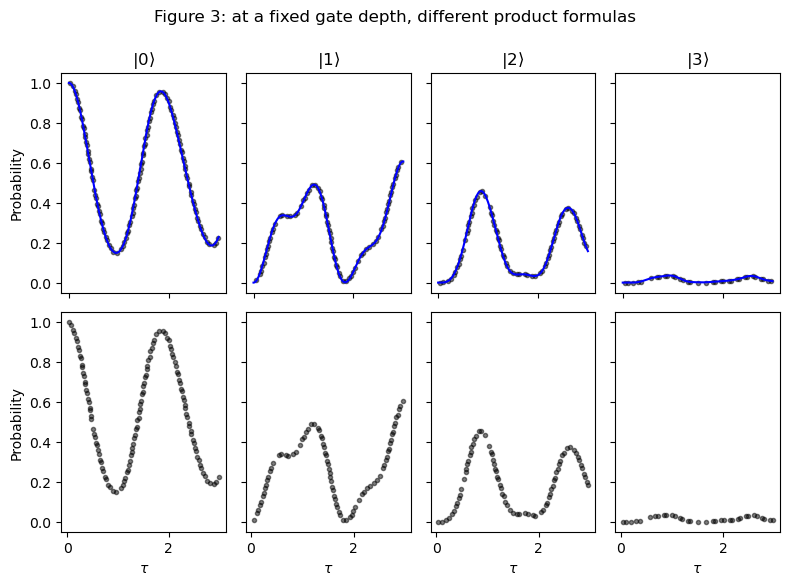

In [5]:
# ρ = 4, θ = 0, s2 = 3, s3 = 3, and τf = 3
alphaPaper = 0.5
mrksz = 3

fig, axes = plt.subplots(2, 4, figsize=(8,6))
for i in range(4):
    f = open('dataWPD/fig3{}/wpd.json'.format(['a','b','c','d'][i]))
    data = json.load(f)
    datatmp = data['datasetColl'][0]['data']
    datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))]); indxs = np.argsort(datatmp2[:,0])
    x = datatmp2[:,0][indxs]; y = datatmp2[:,1][indxs]
    axes[0,i].plot(x, y, 'o', alpha=alphaPaper, color='k', markersize=mrksz)
    axes[1,i].plot(x, y, 'o', alpha=alphaPaper, color='k', markersize=mrksz)
    axes[0,i].set_title(r'$|{}\rangle$'.format(i))
    axes[1,i].set_xlabel(r'$\tau$')
    axes[0,i].set_ylim([-0.05,1.05])
    axes[1,i].set_ylim([-0.05,1.05])
    if i>0:
        axes[0,i].set_yticklabels([])
        axes[1,i].set_yticklabels([])
        
### ED
tdim = 500
tmax = 3.0
tlst = np.linspace(0,tmax,tdim)
dt = tlst[1]-tlst[0]
psi0 = np.array([1,0,0,0],dtype=complex)
# a
psi = np.copy(psi0)
U = expm(-1j*Hs23(rho=4.0)*dt)
probs = np.zeros((tdim,4))
for i in range(tdim):
    probs[i,:] = np.abs(psi)**2
    psi = U @ psi
for i in range(4):
    axes[0,i].plot(tlst, probs[:,i], color='blue') #color='tab:{}'.format(['blue','orange','green','red'][i])
    
axes[0,0].set_ylabel(r'Probability')
axes[1,0].set_ylabel(r'Probability')
for ax in axes[0]:
    ax.set_xticklabels([])
    # Set aspect ratios
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    axesratio = (ymax-ymin)/(xmax-xmin)
    ax.set_aspect(aspect=4/3/axesratio)
for ax in axes[1]:
    # Set aspect ratios
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    axesratio = (ymax-ymin)/(xmax-xmin)
    ax.set_aspect(aspect=4/3/axesratio)
    
plt.suptitle(r'Figure 3: at a fixed gate depth, different product formulas')
plt.tight_layout(h_pad=0.001)
#plt.savefig('fig3.pdf')
plt.show()

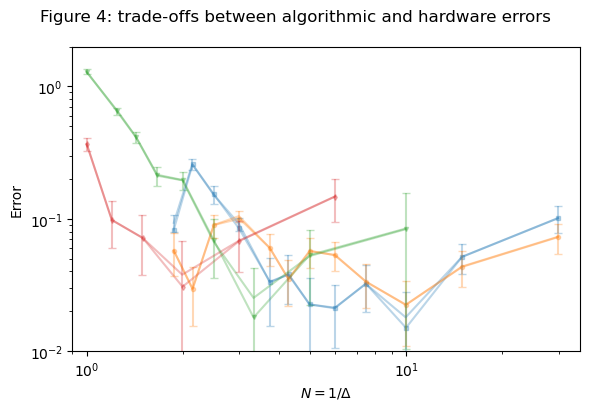

In [6]:
# ρ = 4, θ = 0, s2 = 3, s3 = 3, and τf = 1
alphaPaper = 0.3
mrksz = 3

fig, axes = plt.subplots(1, 1, figsize=(6,4))
f = open('dataWPD/fig4/wpd.json')
data = json.load(f)
#
datatmp = data['datasetColl'][0]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))]); indxs = np.argsort(datatmp2[:,0])
x = datatmp2[:,0][indxs]; y = datatmp2[:,1][indxs]
axes.plot(x, y, 's-', alpha=alphaPaper, color='tab:blue', markersize=mrksz)
#
datatmp = data['datasetColl'][1]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))]); indxs = np.argsort(datatmp2[:,0])
x = datatmp2[:,0][indxs]; y = datatmp2[:,1][indxs]
axes.plot(x, y, 'o-', alpha=alphaPaper, color='tab:orange', markersize=mrksz)
#
datatmp = data['datasetColl'][2]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))]); indxs = np.argsort(datatmp2[:,0])
x = datatmp2[:,0][indxs]; y = datatmp2[:,1][indxs]
axes.plot(x, y, 'v-', alpha=alphaPaper, color='tab:green', markersize=mrksz)
#
datatmp = data['datasetColl'][3]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))]); indxs = np.argsort(datatmp2[:,0])
x = datatmp2[:,0][indxs]; y = datatmp2[:,1][indxs]
axes.plot(x, y, 'd-', alpha=alphaPaper, color='tab:red', markersize=mrksz)
# error bars
datatmp = data['datasetColl'][4]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))]); indxs = np.argsort(datatmp2[:,0])
x = datatmp2[:,0][indxs]; y = datatmp2[:,1][indxs]
yavg = 0.5*(y[1::2]+y[::2])
axes.errorbar(x[::2], yavg, yerr=[np.abs(y[1::2]-yavg), np.abs(y[::2]-yavg)], color='tab:blue', fmt='', capsize=3, alpha=alphaPaper)
#
datatmp = data['datasetColl'][5]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))]); indxs = np.argsort(datatmp2[:,0])
x = datatmp2[:,0][indxs]; y = datatmp2[:,1][indxs]
yavg = 0.5*(y[1::2]+y[::2])
axes.errorbar(x[::2], yavg, yerr=[np.abs(y[1::2]-yavg), np.abs(y[::2]-yavg)], color='tab:orange', fmt='', capsize=3, alpha=alphaPaper)
#
datatmp = data['datasetColl'][6]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))]); indxs = np.argsort(datatmp2[:,0])
x = datatmp2[:,0][indxs]; y = datatmp2[:,1][indxs]
yavg = 0.5*(y[1::2]+y[::2])
axes.errorbar(x[::2], yavg, yerr=[np.abs(y[1::2]-yavg), np.abs(y[::2]-yavg)], color='tab:green', fmt='', capsize=3, alpha=alphaPaper)
#
datatmp = data['datasetColl'][7]['data']
datatmp2 = np.array([datatmp[i]['value'] for i in range(len(datatmp))]); indxs = np.argsort(datatmp2[:,0])
x = datatmp2[:,0][indxs]; y = datatmp2[:,1][indxs]
yavg = 0.5*(y[1::2]+y[::2])
axes.errorbar(x[::2], yavg, yerr=[np.abs(y[1::2]-yavg), np.abs(y[::2]-yavg)], color='tab:red', fmt='', capsize=3, alpha=alphaPaper)

#
axes.set_xlim([9e-1,3.5e1])
axes.set_ylim([1e-2,2e0])
axes.set_xscale('log')
axes.set_yscale('log')
axes.set_xlabel(r'$N=1/\Delta$')
axes.set_ylabel(r'Error')
# Set aspect ratios
xmin, xmax = axes.get_xlim()
ymin, ymax = axes.get_ylim()
axesratio = (np.log10(ymax)-np.log10(ymin))/(np.log10(xmax)-np.log10(xmin))
axes.set_aspect(aspect=3/5/axesratio)
#
plt.suptitle(r'Figure 4: trade-offs between algorithmic and hardware errors')
plt.tight_layout()
#plt.savefig('fig4.pdf')
plt.show()